In [39]:
# So we can load files from other sub-directories, e.g. datasets.
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path = [module_path] + sys.path
module_path = os.path.abspath(os.path.join('../unlabeled_extrapolation'))
if module_path not in sys.path:
    sys.path = [module_path] + sys.path

import torchvision
import torch
from torchvision import models
import importlib
import numpy as np
from torchvision import transforms
from unlabeled_extrapolation.datasets import cifar10c
from unlabeled_extrapolation.datasets import stl_cifar_style
from unlabeled_extrapolation.datasets import cinic
from unlabeled_extrapolation.datasets import imnet_intersect_c10
import pickle
import json
import utils.utils as utils
from utils.accumulator import Accumulator
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import cm
import PIL
import torchvision
importlib.reload(cifar10c)
importlib.reload(stl_cifar_style)
importlib.reload(cinic)

<module 'unlabeled_extrapolation.datasets.cinic' from '/juice/scr/ananya/cifar_experiments/unlabeled_extrapolation/unlabeled_extrapolation/datasets/cinic.py'>

# CIFAR Dataset

In [32]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
# We add normalize in actual training.
augment_transform = transforms.Compose([
            transforms.Resize(224, interpolation=PIL.Image.BICUBIC),
            transforms.ToTensor()])
cifar_dataset = torchvision.datasets.CIFAR10(train=True, download=False, root='/u/scr/ananya/cifar10_dataset', transform=augment_transform)
# config_path = '/u/scr/ananya/cifar_experiments/unlabeled_extrapolation/configs/adaptation/living17.yaml'
# config = quinine.Quinfig(config_path)
# preprocess_config(config, config_path)
# config.train_dataset.classname = 'unlabeled_extrapolation.' + config.train_dataset.classname
# for test_dataset_config in config.test_datasets:
#     test_dataset_config.classname = 'unlabeled_extrapolation.' + test_dataset_config.classname

4


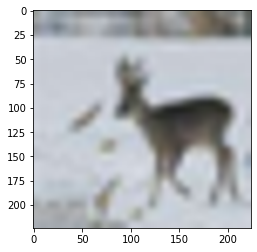

In [33]:
idx = 20
img = cifar_dataset[idx][0].permute((1, 2, 0))
plt.imshow(img)
print(cifar_dataset[idx][1])

# CIFAR-10C Dataset

In [ ]:
cifar10c_fog = cifar10c.CIFAR10C(root='/juice/scr/ananya/CIFAR-10-C/', corruption='snow', severity=2)

In [ ]:
idx = 15
img = cifar10c_fog[idx][0]
plt.imshow(img)
print(cifar10c_fog[idx][1])

# STL Dataset

In [34]:
stl_data = stl_cifar_style.STL10(root='/juice/scr/ananya/stl10_dataset/', split='test', download=False)

In [35]:
stl_data.classes

['airplane',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'NONE',
 'horse',
 'ship',
 'truck']

ship


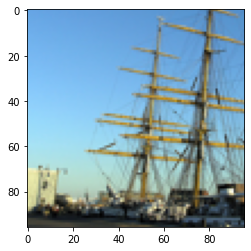

In [37]:
idx = 2004
img = stl_data[idx][0]
plt.imshow(img)
print(stl_data.classes[stl_data[idx][1]])

In [14]:
stl_downsampled = stl_cifar_style.STL10(root='/juice/scr/ananya/stl10_dataset/', split='test', download=False,
                                        transform=transforms.Resize(32))

airplane


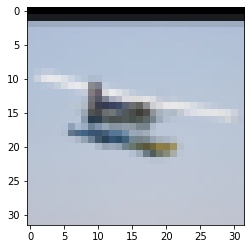

In [37]:
idx = 12
img = stl_downsampled[idx][0]
plt.imshow(img)
print(stl_data.classes[stl_data[idx][1]])

# CINIC Dataset

In [21]:
cinic_directory = '/juice/scr/ananya/cinic-10-imagenet'

cinic_mean = [0.47889522, 0.47227842, 0.43047404]
cinic_std = [0.24205776, 0.23828046, 0.25874835]
cinic_data = cinic.CINICImNet(root=cinic_directory, mode='valid', transform=transforms.ToTensor())
#                                      transform=transforms.Compose([transforms.ToTensor(),
#                                      transforms.Normalize(mean=cinic_mean,std=cinic_std)]))
cinic_train = torch.utils.data.DataLoader(
    cinic_data, batch_size=128, shuffle=True)

0


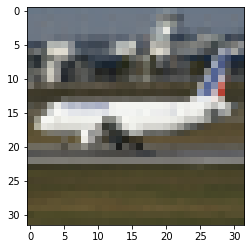

In [25]:
idx = 1
img = np.transpose(cinic_data[idx][0], axes=[1,2,0])
plt.imshow(img)
print(cinic_data[idx][1])

In [23]:
batch = next(iter(cinic_train))
input, target = batch
print(len(batch))
print(len(input))

2
128


# ImageNet-intersect-Cifar10

In [40]:
inc10_dataset = imnet_intersect_c10.ImNetnC10(root='/u/scr/ananya/balanced_imnet_intersect_c10_val/')

0


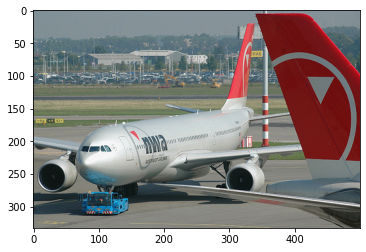

In [46]:
idx = 2
img = inc10_dataset[idx][0]
plt.imshow(img)
print(inc10_dataset[idx][1])


# Play around with models 

In [19]:
model_ft = models.resnet50(pretrained=True)

<generator object Module.children at 0x7f29643b79d0>

In [26]:
list(list(model_ft.children())[0].parameters())[0].requires_grad = False

In [31]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 